In [9]:

import os
import numpy as np
import pandas as pd

In [10]:
print("vikraNT")

vikraNT


In [11]:
print(os.getcwd())


C:\Users\643729


In [12]:
path=r'D:\deep_learning_specilization\digit_recogniton_keras\Handwritten-Digit-Recognition-using-Deep-Learning-master\1. K Nearest Neighbors'

In [13]:
os.chdir(path)

In [14]:
print(os.getcwd())

D:\deep_learning_specilization\digit_recogniton_keras\Handwritten-Digit-Recognition-using-Deep-Learning-master\1. K Nearest Neighbors


In [15]:

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [16]:
import MNIST_Dataset_Loader



In [17]:
import sys
sys.path.append(r'D:\deep_learning_specilization\digit_recogniton_keras\Handwritten-Digit-Recognition-using-Deep-Learning-master\1. K Nearest Neighbors')

In [18]:
import MNIST_Dataset_Loader.mnist_loader

In [19]:
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
print("yahoo")

yahoo


In [22]:
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file


In [23]:
print('\nLoading MNIST Data...')


In [24]:
print("vikrant")

In [25]:
data = MNIST('./MNIST_Dataset_Loader/dataset/')

In [26]:
print(type(data))
print("vikrant---------------")
print('\nLoading Training Data...')

In [27]:
img_train, labels_train = data.load_training()

In [28]:
train_img = np.array(img_train)

In [29]:
train_labels = np.array(labels_train)

In [30]:
print('\nLoading Testing Data...')

In [31]:
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [32]:
X = train_img
y = train_labels

In [33]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


In [34]:
print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
with open('MNIST_KNN.pickle','wb') as f:
	pickle.dump(clf, f)


In [36]:
pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

In [37]:
print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)


In [38]:
print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

In [39]:
print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

In [40]:
print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)


In [41]:
print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


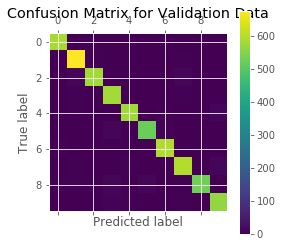

In [42]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

In [44]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

In [45]:
print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

In [46]:
print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

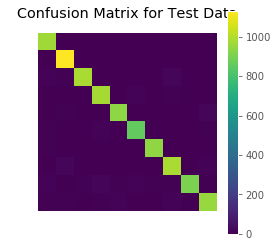

In [47]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()


In [48]:

sys.stdout = old_stdout
log_file.close()


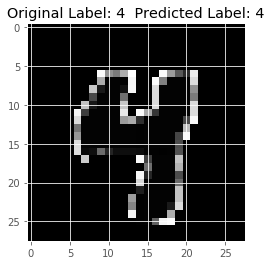

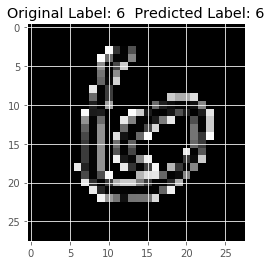

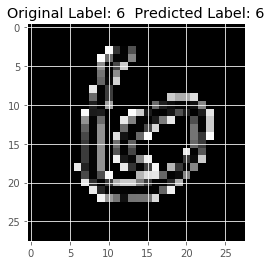

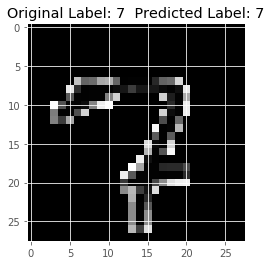

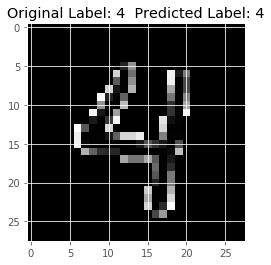

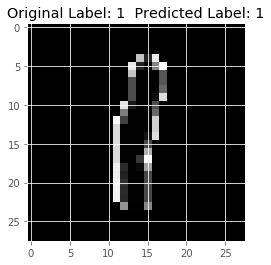

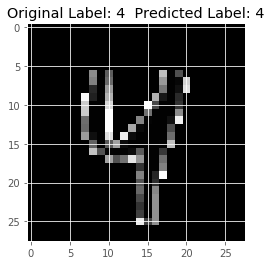

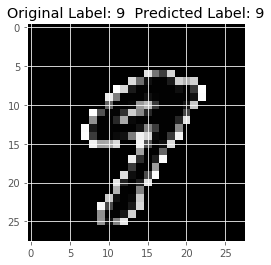

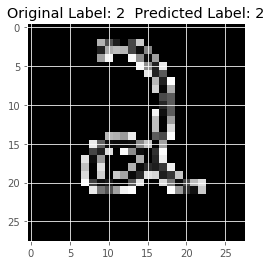

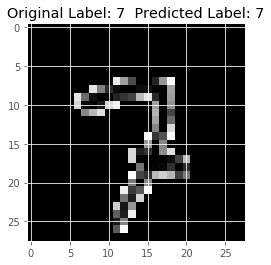

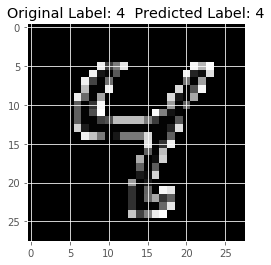

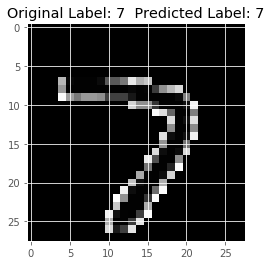

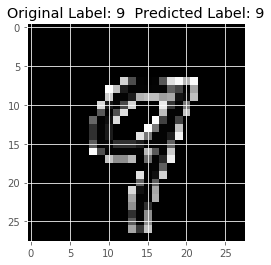

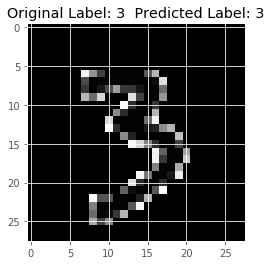

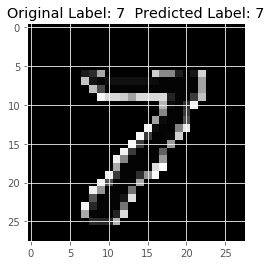

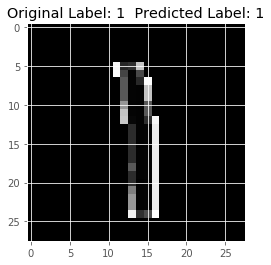

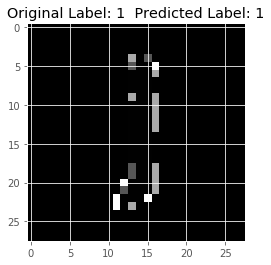

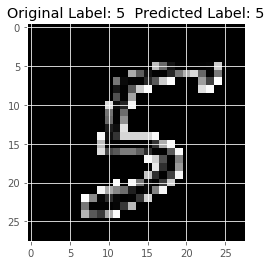

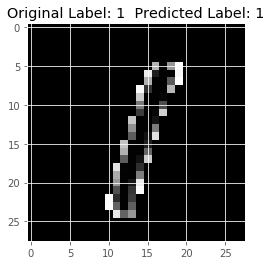

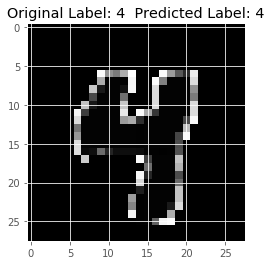

In [49]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------